VGG 16

In [1]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import cv2
import PIL
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split


In [3]:
path = r"C:\Users\Asus\Downloads\output_VGG16-grayscale-0.3\UCF11_grayscale"
path_split = r"C:\Users\Asus\Downloads\output_VGG16-grayscale-0.3\datasplit_vgg16-0.3"
kelas = os.listdir(path)
dataset = path
print("Daftar kelas = ",kelas,"\n\nBanyak kelas = ", len(kelas))

Daftar kelas =  ['basketball-grayscale', 'biking-grayscale', 'diving-grayscale', 'golf_swing-grayscale', 'horse_riding-grayscale', 'soccer_juggling-grayscale', 'swing-grayscale', 'tennis_swing-grayscale', 'trampoline_jumping-grayscale', 'vollyball_spiking-grayscale', 'walking-grayscale'] 

Banyak kelas =  11


In [4]:
import os

dataset="UCF11_grayscale"
def daftar_file(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

daftar_file(dataset)

UCF11_grayscale/
    basketball-grayscale/
        framebasketball_100_3243.png
        framebasketball_100_3244.png
        framebasketball_100_3245.png
        framebasketball_100_3246.png
        framebasketball_100_3247.png
        framebasketball_100_3248.png
        framebasketball_100_3249.png
        framebasketball_100_3250.png
        framebasketball_100_3251.png
        framebasketball_100_3252.png
        framebasketball_100_3253.png
        framebasketball_100_3254.png
        framebasketball_100_3255.png
        framebasketball_100_3256.png
        framebasketball_100_3257.png
        framebasketball_100_3258.png
        framebasketball_100_3259.png
        framebasketball_100_3260.png
        framebasketball_100_3261.png
        framebasketball_100_3262.png
        framebasketball_100_3263.png
        framebasketball_100_3264.png
        framebasketball_100_3265.png
        framebasketball_100_3266.png
        framebasketball_100_3267.png
        framebasketball_100_3268

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Tentukan path ke dataset Anda
dataset_path = path

# Tentukan path ke direktori di mana Anda ingin menyimpan dataset terbagi
output_path = path_split

# Tentukan rasio pembagian yang diinginkan (80% pelatihan, 20% pengujian)
train_ratio = 0.8
test_ratio = 0.2

# List semua subdirektori dalam path dataset (diasumsikan setiap subdirektori adalah satu kelas)
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Buat direktori output untuk set pelatihan dan pengujian
train_output_path = os.path.join(output_path, 'train')
test_output_path = os.path.join(output_path, 'test')

os.makedirs(train_output_path, exist_ok=True)
os.makedirs(test_output_path, exist_ok=True)

# Iterasi untuk setiap folder kelas
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    # List semua file dalam folder kelas saat ini
    all_files = [file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))]
    # Bagi file-file tersebut menjadi set pelatihan dan pengujian
    train_files, test_files = train_test_split(all_files, test_size=test_ratio, random_state=42)
    
    # Pindahkan gambar-gambar set pelatihan ke direktori pelatihan
    for file in train_files:
        src_path = os.path.join(class_path, file)
        dst_path = os.path.join(train_output_path, class_folder, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    # Pindahkan gambar-gambar set pengujian ke direktori pengujian
    for file in test_files:
        src_path = os.path.join(class_path, file)
        dst_path = os.path.join(test_output_path, class_folder, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)


In [5]:
dataset = "datasplit_vgg16-0.3"
daftar_file(dataset)

datasplit_vgg16-0.3/
    test/
        basketball-grayscale/
            framebasketball_100_3251.png
            framebasketball_100_3255.png
            framebasketball_100_3257.png
            framebasketball_100_3260.png
            framebasketball_100_3266.png
            framebasketball_100_3269.png
            framebasketball_101_3272.png
            framebasketball_101_3275.png
            framebasketball_101_3276.png
            framebasketball_101_3286.png
            framebasketball_101_3287.png
            framebasketball_101_3288.png
            framebasketball_101_3294.png
            framebasketball_101_3295.png
            framebasketball_102_3299.png
            framebasketball_102_3304.png
            framebasketball_102_3312.png
            framebasketball_102_3313.png
            framebasketball_102_3316.png
            framebasketball_103_3323.png
            framebasketball_103_3327.png
            framebasketball_104_3336.png
            framebasketball_104_3338.

In [6]:
import pandas as pd
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import plot_model
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16

from keras import Model, layers
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

In [7]:
# re-size all the images to this
IMAGE_SIZE = (224, 224, 3)
train_path= dataset+'/train'
test_path = dataset+'/test'

In [8]:
quantity_train = {} 
quantity_test = {}
for folder in os.listdir(train_path):
    quantity_train[folder] = len(os.listdir(train_path+'/'+folder))

for folder in os.listdir(test_path):
    quantity_test[folder] = len(os.listdir(test_path+'/'+folder))


quantity_train = pd.DataFrame(list(quantity_train.items()), index=range(0,len(quantity_train)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_test.items()), index=range(0,len(quantity_test)), columns=['class','count'])

# figure, ax = plt.subplots(1,2,figsize=(20,5))
# sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
# sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Banyak citra di training set:", sum(quantity_train['count'].values))
print("Banyak citra di testing set:",sum(quantity_test['count'].values))
print("Total citra:",sum(quantity_train['count'].values)+sum(quantity_test['count'].values))

# plt.show()

Banyak citra di training set: 54980
Banyak citra di testing set: 13751
Total citra: 68731


In [9]:
def save_history(history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save ke json 
    hist_json_file = model_name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save ke csv 
    hist_csv_file = model_name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
  try:
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def plot_loss_from_history(history):
  try:
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def do_history_stuff(history, history_file_name, isinception=False):
    save_history(history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

In [10]:
def show_few_images(number_of_examples=2, predict_using_model=None):
    figure1, ax1 = plt.subplots(number_of_examples,len(os.listdir(train_path)), figsize=(20,4*number_of_examples))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    for i, folder in enumerate(os.listdir(train_path)):
        image_ids = os.listdir(os.path.join(train_path,folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_examples)]:
            display = plt.imread(os.path.join(train_path,folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(predict_using_model):
                predicted_classname = inv_map_classes[np.argmax(vgg16_final_model.predict(np.array([display])))]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1

In [11]:
tf.keras.backend.clear_session()

In [12]:
import os
def savePercobaan():
  try: 
    os.mkdir("Model VGG-16") 
  except OSError as error: 
    print(error)
  saveModel()

In [13]:
def saveModel():
  try: 
    os.mkdir("percobaan"+"/model") 
  except OSError as error: 
    print(error)

DATA GENERATOR

In [14]:
#normalisasi
train_datagen = ImageDataGenerator(rescale = 1.0/255., validation_split=0.2, shear_range=0.2,zoom_range=0.2)
train_generator16 = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, shuffle=True, class_mode='categorical', subset='training')

validation_generator16 = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
test_generator16 = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=1, shuffle=True, class_mode='categorical')



Found 43990 images belonging to 11 classes.
Found 10990 images belonging to 11 classes.
Found 13751 images belonging to 11 classes.


In [15]:
inv_map_classes = {v: k for k, v in validation_generator16.class_indices.items()}
#print(validation_generator16.class_indices)
print(inv_map_classes)

{0: 'basketball-grayscale', 1: 'biking-grayscale', 2: 'diving-grayscale', 3: 'golf_swing-grayscale', 4: 'horse_riding-grayscale', 5: 'soccer_juggling-grayscale', 6: 'swing-grayscale', 7: 'tennis_swing-grayscale', 8: 'trampoline_jumping-grayscale', 9: 'vollyball_spiking-grayscale', 10: 'walking-grayscale'}


MODEL TRAINING


In [16]:
from keras.layers import BatchNormalization
def vgg16_training(vgg_epoch, learning_rate, batch_size, dropout_rate):
  vgg16_model = VGG16(pooling='max', weights='imagenet', include_top=False, input_shape=(244,244,3), classes=11) #defaultnya AVERAGE POOLING
  for layers in vgg16_model.layers:
              layers.trainable=False

  last_output_vgg16 = vgg16_model.layers[-1].output
  vgg_16 = Flatten()(last_output_vgg16) #awalnya di bawah last output
  vgg_16 = BatchNormalization()(vgg_16)
  vgg_16 = Dense(128, activation = 'relu')(vgg_16)
  vgg_16 = BatchNormalization()(vgg_16)
  vgg_16 = Dropout(dropout_rate)(vgg_16)

  #vgg_16 = Dense(64, activation = 'relu')(vgg_16)
  #vgg_16 = Dropout(dropout_rate)(vgg_16)
  vgg_16 = Dense(11, activation = 'softmax')(vgg_16)
  vgg16_final_model = Model(vgg16_model.input, vgg_16)
  
  opt = Adam(learning_rate=learning_rate)
  vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])
  #vgg16_final_model.summary()

  plot_model(model=vgg16_final_model, show_shapes=True)

  train_generator16.batch_size = batch_size

  vgg16_filepath = '/model/vgg_16_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
  vgg16_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
  vgg16_history = vgg16_final_model.fit(train_generator16, epochs = vgg_epoch, validation_data = validation_generator16,callbacks=[vgg16_checkpoint,early_stopping],verbose=1)

  do_history_stuff (vgg16_history, 'vgg16_model')
  save_vgg16(vgg16_final_model)

  predictionTest(vgg16_final_model)

  return(vgg16_final_model)

In [17]:
def save_vgg16(vgg16_final_model):
  vgg16_final_model.save(('percobaan'+'/vgg16-model'+'.h5'))

EVALUASI

In [18]:
def acc_plot(vgg16_history):
  plt.figure(figsize=(10, 8))
  plt.plot(vgg16_history.history['acc'], label='train acc')
  plt.plot(vgg16_history.history['val_acc'], label='val acc')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

In [19]:
def loss_plot(vgg16_history):
  plt.figure(figsize=(10, 8))
  plt.plot(vgg16_history.history['loss'], label='train l/oss')
  plt.plot(vgg16_history.history['val_loss'], label='val loss')
  plt.legend()
  plt.title('Loss')
  plt.show()

In [20]:
def predictionTest(vgg16_final_model):
  true_value = []
  vgg_pred = []
  for folder in os.listdir(test_path):
      test_image_ids = os.listdir(os.path.join(test_path,folder))
      
      for image_id in test_image_ids[:int(len(test_image_ids))]:
          path = os.path.join(test_path,folder,image_id)
          #print(path)
          true_value.append(test_generator16.class_indices[folder])
          img = cv2.resize(cv2.imread(path),(244,244))
          img_normalized = img/255
          #vgg
          vgg16_image_prediction = np.argmax(vgg16_final_model.predict(np.array([img_normalized]), verbose = 0)) #verbose biar gak ngeprint
          vgg_pred.append(vgg16_image_prediction)

  print("\n")
  clf_report(true_value, vgg_pred)

In [21]:
arr_accuracy16 = []
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    classes = validation_generator16.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    arr_accuracy16.append(model_accuracy)
    plt.figure(figsize=(11,11))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    plt.savefig("confusion_matrix16_nosegmented-0.3.png")
    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [22]:
print(validation_generator16.class_indices.keys())

dict_keys(['basketball-grayscale', 'biking-grayscale', 'diving-grayscale', 'golf_swing-grayscale', 'horse_riding-grayscale', 'soccer_juggling-grayscale', 'swing-grayscale', 'tennis_swing-grayscale', 'trampoline_jumping-grayscale', 'vollyball_spiking-grayscale', 'walking-grayscale'])


In [23]:
hasilTabel = pd.DataFrame(columns=['Epoch', 'Learning Rate', 'Batch Size', 'Dropout Rate','Accuracy'])
print(hasilTabel)

Empty DataFrame
Columns: [Epoch, Learning Rate, Batch Size, Dropout Rate, Accuracy]
Index: []


RUN KODE

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/30
1375/1375 [==============================] - ETA: 0s - loss: 0.6248 - acc: 0.8005
Epoch 1: val_acc improved from -inf to 0.65833, saving model to /model\vgg_16_-saved-model-01-acc-0.66.hdf5
1375/1375 [==============================] - 2272s 2s/step - loss: 0.6248 - acc: 0.8005 - val_loss: 1.2739 - val_acc: 0.6583
Epoch 2/30


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1375/1375 [==============================] - ETA: 0s - loss: 0.2993 - acc: 0.9041
Epoch 2: val_acc improved from 0.65833 to 0.67025, saving model to /model\vgg_16_-saved-model-02-acc-0.67.hdf5
1375/1375 [==============================] - 2264s 2s/step - loss: 0.2993 - acc: 0.9041 - val_loss: 1.2015 - val_acc: 0.6702
Epoch 3/30
1375/1375 [==============================] - ETA: 0s - loss: 0.2357 - acc: 0.9231
Epoch 3: val_acc did not improve from 0.67025
1375/1375 [==============================] - 2235s 2s/step - loss: 0.2357 - acc: 0.9231 - val_loss: 1.3542 - val_acc: 0.6682
Epoch 4/30
1375/1375 [==============================] - ETA: 0s - loss: 0.2103 - acc: 0.9304
Epoch 4: val_acc improved from 0.67025 to 0.67116, saving model to /model\vgg_16_-saved-model-04-acc-0.67.hdf5
1375/1375 [==============================] - 2230s 2s/step - loss: 0.2103 - acc: 0.9304 - val_loss: 1.2962 - val_acc: 0.6712
Epoch 5/30
1375/1375 [==============================] - ETA: 0s - loss: 0.1863 - acc: 0.9

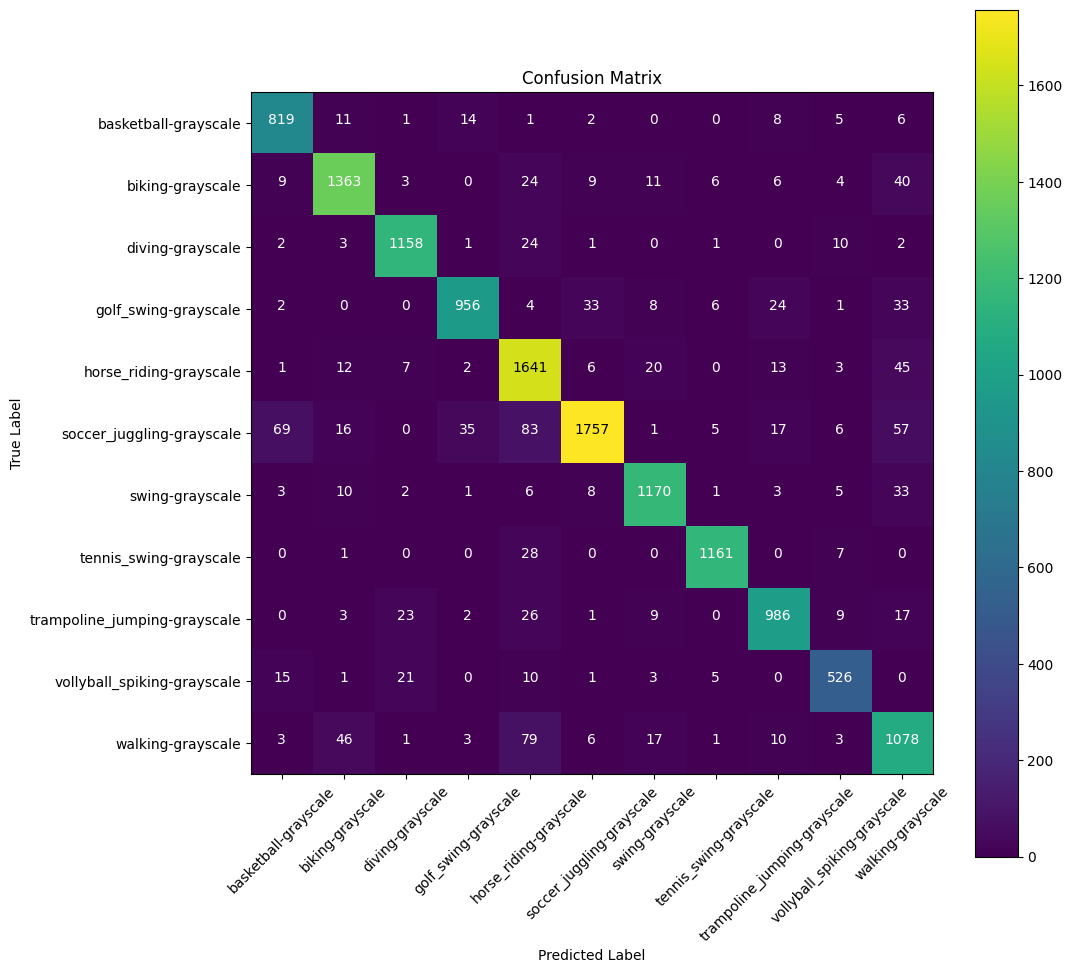

In [24]:
import timeit

start = timeit.default_timer()

# Define the hyperparameters
vgg_epoch = 30
learning_rate = 0.001
batch_size = 32
dropout_rate = 0.3

# Call the function with the defined hyperparameters
vgg16_training(vgg_epoch, learning_rate, batch_size, dropout_rate)


import warnings

# Menonaktifkan semua pesan peringatan
warnings.filterwarnings('ignore')

stop = timeit.default_timer()

print(' Running Time : ', stop - start)

In [25]:
print(arr_accuracy16)

[0.9173878263399026]


In [35]:
path_model = r"C:\Users\Asus\Downloads\nitip celya\percobaan\vgg16-model.h5"

#Load partly trained model
from keras.models import load_model
model = load_model(path_model)

#Continue training
model.fit(train_generator16, epochs = 4, validation_data = validation_generator16,verbose=1)

Epoch 1/4
1375/1375 [==============================] - 2258s 2s/step - loss: 0.1563 - acc: 0.9491 - val_loss: 1.3090 - val_acc: 0.7010
Epoch 2/4
1375/1375 [==============================] - 1913s 1s/step - loss: 0.1552 - acc: 0.9472 - val_loss: 1.3380 - val_acc: 0.6793
Epoch 3/4
1375/1375 [==============================] - 1913s 1s/step - loss: 0.1470 - acc: 0.9511 - val_loss: 1.4426 - val_acc: 0.6693
Epoch 4/4
1375/1375 [==============================] - 1911s 1s/step - loss: 0.1395 - acc: 0.9540 - val_loss: 1.4798 - val_acc: 0.6626


In [36]:
# Evaluasi model pada set data uji
test_loss, test_accuracy = model.evaluate(test_generator16)
print(f'Loss pada Data Uji: {test_loss:.4f}')
print(f'Akurasi pada Data Uji: {test_accuracy:.4f}')

13751/13751 [==============================] - 679s 49ms/step - loss: 0.3730 - acc: 0.9114
Loss pada Data Uji: 0.3730
Akurasi pada Data Uji: 0.9114


TESTING

In [27]:
# from tensorflow.keras.models import load_model

# path = r"D:\skripsi\DataCoba\UCF11_greyscale\basketball-greyscale\framebasketball_1_1.png"
# # img = cv2.resize(cv2.imread(path),(244,244,3))
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # x = imageEnhancement(img)
# # x = imageSegmentation(x)
# # z = PIL.Image.fromarray(x)
# # z.save("citraUji.png")

# img = cv2.imread(path)
# img_normalized = img/255

# path_model = r"D:\skripsi\percobaan\vgg16-model.h5"
# model = load_model(path_model)

# # PIL.Image.fromarray(x)
# vgg16_image_prediction = np.argmax(model.predict(np.array([img_normalized])))
# prob = np.amax(model.predict(np.array([img_normalized])))
# cv2.imshow(img)
# print("Prediksi:",inv_map_classes[vgg16_image_prediction],"| Probabilitas:",prob)